## Importing libraries, whatever we want

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Create the path of csv file and load that path into the dataframe

In [2]:
path = r"C:\Users\SURESH\Inno 271-273\Web Scraping\New Imdb\Movies in IMDb.csv"

In [3]:
imdb_df = pd.read_csv(path)
imdb_df

,movie_name,released_Year,runtime,Certificate,rating,vote_count,meta_score,director
0,Citizen Kane,1941,1h 59m,PG,8.3,476K,100.0,Orson Welles
1,Vertigo,1958,2h 8m,PG,8.3,439K,100.0,Alfred Hitchcock
2,2001: A Space Odyssey,1968,2h 29m,G,8.3,743K,84.0,Stanley Kubrick
3,Tokyo Story,1953,2h 17m,Not Rated,8.1,72K,100.0,Yasujirô Ozu
4,The Rules of the Game,1939,1h 50m,Not Rated,7.9,32K,99.0,Jean Renoir
...,...,...,...,...,...,...,...,...
995,Kwaidan,1964,3h 3m,Not Rated,7.9,21K,NaN,Masaki Kobayashi
996,Mildred Pierce,1945,1h 51m,Approved,7.9,30K,88.0,Michael Curtiz
997,The Naked Kiss,1964,1h 30m,Approved,7.2,9.1K,83.0,Samuel Fuller
998,The Last Detail,1973,1h 44m,R,7.5,29K,86.0,Hal Ashby


In [4]:
imdb_df.shape  # To see the shape of dataframe

(1000, 8)

In [5]:
imdb_df.columns # To see columns of dataframe

Index(['movie_name', 'released_Year', 'runtime', 'Certificate', 'rating',
       'vote_count', 'meta_score', 'director'],
      dtype='object')

In [6]:
imdb_df.columns = imdb_df.columns.str.lower().str.strip()   # To convert the column names into lowercase

## Cleaning the dataframe

In [7]:
imdb_df.info()  # Here we can see the information about the dataframe like null values and dtypes of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_name     998 non-null    object 
 1   released_year  1000 non-null   int64  
 2   runtime        995 non-null    object 
 3   certificate    905 non-null    object 
 4   rating         1000 non-null   float64
 5   vote_count     1000 non-null   object 
 6   meta_score     611 non-null    float64
 7   director       1000 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 62.6+ KB


* The dataframe contains 8 columns.
* 4 columns have null values and remaining columns have no null values

In [8]:
imdb_df.isna().sum()

movie_name         2
released_year      0
runtime            5
certificate       95
rating             0
vote_count         0
meta_score       389
director           0
dtype: int64

In [9]:
imdb_df.dropna(inplace=True)   # Here we drop the null values in the overall dataframe 

In [10]:
imdb_df.info()  # After droped null values, all columns having same no.of records

<class 'pandas.core.frame.DataFrame'>
Index: 584 entries, 0 to 998
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_name     584 non-null    object 
 1   released_year  584 non-null    int64  
 2   runtime        584 non-null    object 
 3   certificate    584 non-null    object 
 4   rating         584 non-null    float64
 5   vote_count     584 non-null    object 
 6   meta_score     584 non-null    float64
 7   director       584 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 41.1+ KB


In [11]:
imdb_df.duplicated().sum()  # Here we can see the dataframe contains one duplicated value.

1

In [12]:
imdb_df[imdb_df.duplicated(keep=False)] 

,movie_name,released_year,runtime,certificate,rating,vote_count,meta_score,director
364,The Thin Blue Line,1988,1h 41m,Not Rated,7.9,27K,79.0,Errol Morris
400,The Thin Blue Line,1988,1h 41m,Not Rated,7.9,27K,79.0,Errol Morris


In [13]:
imdb_df.drop_duplicates(inplace=True)      # drop the duplicated value

In [14]:
imdb_df

,movie_name,released_year,runtime,certificate,rating,vote_count,meta_score,director
0,Citizen Kane,1941,1h 59m,PG,8.3,476K,100.0,Orson Welles
1,Vertigo,1958,2h 8m,PG,8.3,439K,100.0,Alfred Hitchcock
2,2001: A Space Odyssey,1968,2h 29m,G,8.3,743K,84.0,Stanley Kubrick
3,Tokyo Story,1953,2h 17m,Not Rated,8.1,72K,100.0,Yasujirô Ozu
4,The Rules of the Game,1939,1h 50m,Not Rated,7.9,32K,99.0,Jean Renoir
...,...,...,...,...,...,...,...,...
993,The Godfather Part III,1990,2h 42m,R,7.6,434K,60.0,Francis Ford Coppola
994,Cul-de-sac,1966,1h 52m,Not Rated,7.0,14K,75.0,Roman Polanski
996,Mildred Pierce,1945,1h 51m,Approved,7.9,30K,88.0,Michael Curtiz
997,The Naked Kiss,1964,1h 30m,Approved,7.2,9.1K,83.0,Samuel Fuller


In [15]:
imdb_df['hour'] = imdb_df['runtime'].str.split(' ').apply(lambda x : int(x[0].split('h')[0]))*60

In [16]:
imdb_df['minutes'] = imdb_df['runtime'].str.split(' ').apply(lambda x : int(x[1].split('m')[0]))

In [17]:
imdb_df['runtime'] = imdb_df['hour']+imdb_df['minutes']

In [18]:
imdb_df.rename(columns={'runtime':'runtime_mins'}, inplace=True)

In [19]:
imdb_df['vote_count'] = imdb_df['vote_count'].apply(lambda x: int(float(x.replace('K', '')))*1000 if 'K' in x else int(float(x.replace('M','')))*1000000 if 'M' in x else int(x))

In [20]:
imdb_df.drop(columns=['hour','minutes'], inplace=True)

In [21]:
imdb_df['meta_score'] = imdb_df['meta_score'].astype('int64') # Change the datatype of meta_score column from float64 to int64

In [22]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 583 entries, 0 to 998
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_name     583 non-null    object 
 1   released_year  583 non-null    int64  
 2   runtime_mins   583 non-null    int64  
 3   certificate    583 non-null    object 
 4   rating         583 non-null    float64
 5   vote_count     583 non-null    int64  
 6   meta_score     583 non-null    int64  
 7   director       583 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 41.0+ KB


In [23]:
imdb_df.head()

,movie_name,released_year,runtime_mins,certificate,rating,vote_count,meta_score,director
0,Citizen Kane,1941,119,PG,8.3,476000,100,Orson Welles
1,Vertigo,1958,128,PG,8.3,439000,100,Alfred Hitchcock
2,2001: A Space Odyssey,1968,149,G,8.3,743000,84,Stanley Kubrick
3,Tokyo Story,1953,137,Not Rated,8.1,72000,100,Yasujirô Ozu
4,The Rules of the Game,1939,110,Not Rated,7.9,32000,99,Jean Renoir


## Check the outliers

released_year       Axes(0.125,0.53;0.227941x0.35)
runtime_mins     Axes(0.398529,0.53;0.227941x0.35)
rating           Axes(0.672059,0.53;0.227941x0.35)
vote_count          Axes(0.125,0.11;0.227941x0.35)
meta_score       Axes(0.398529,0.11;0.227941x0.35)
dtype: object

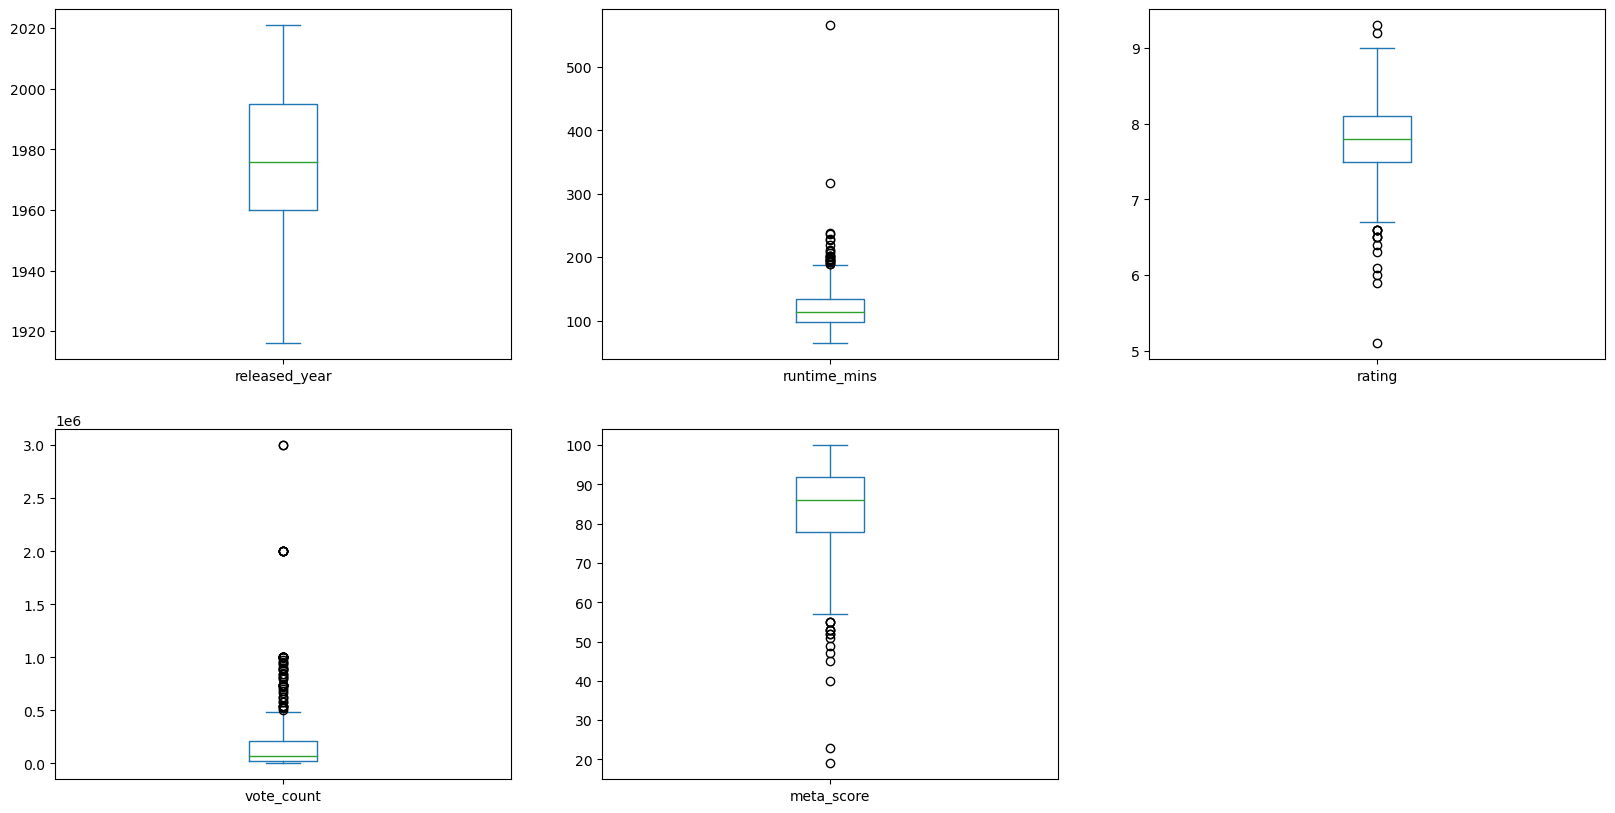

In [24]:
imdb_df[['released_year','runtime_mins','rating','vote_count','meta_score']].plot(kind = 'box', subplots = True, layout = (2,3), figsize = (20,10))

* runtime_mins, rating, vote_count, meta_score columns have outliers

## Handling Outliers

In [25]:
imdb_df = imdb_df[imdb_df['runtime_mins']<300]
imdb_df = imdb_df[imdb_df['rating']>5.5]
imdb_df = imdb_df[imdb_df['vote_count']<1500000]
imdb_df = imdb_df[imdb_df['meta_score']>40]

released_year       Axes(0.125,0.53;0.227941x0.35)
runtime_mins     Axes(0.398529,0.53;0.227941x0.35)
rating           Axes(0.672059,0.53;0.227941x0.35)
vote_count          Axes(0.125,0.11;0.227941x0.35)
meta_score       Axes(0.398529,0.11;0.227941x0.35)
dtype: object

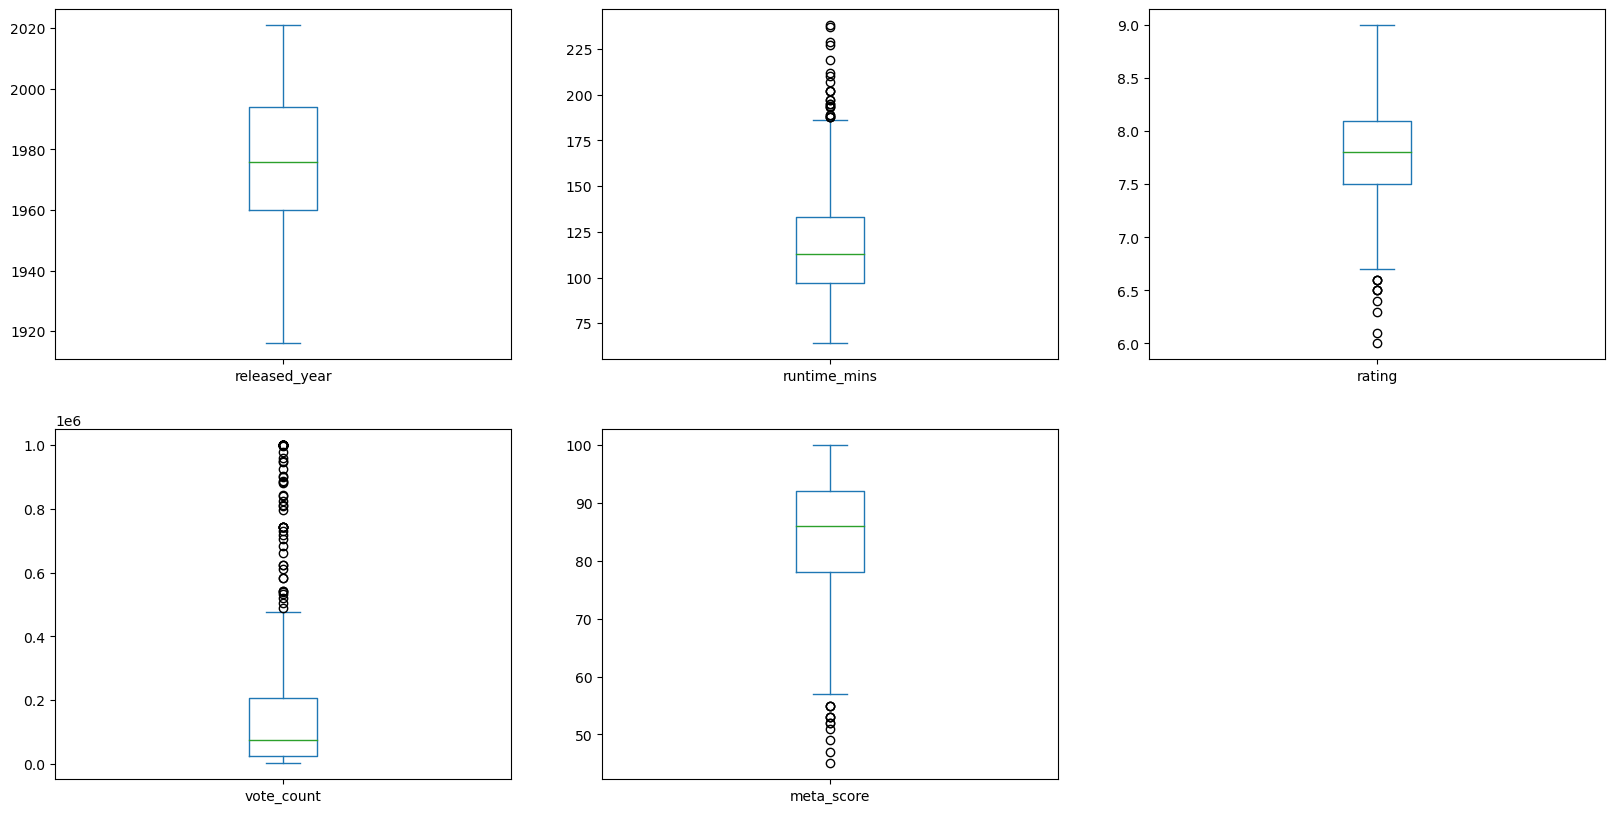

In [26]:
imdb_df[['released_year','runtime_mins','rating','vote_count','meta_score']].plot(kind = 'box', subplots = True, layout = (2,3), figsize = (20,10))

In [27]:
imdb_df

,movie_name,released_year,runtime_mins,certificate,rating,vote_count,meta_score,director
0,Citizen Kane,1941,119,PG,8.3,476000,100,Orson Welles
1,Vertigo,1958,128,PG,8.3,439000,100,Alfred Hitchcock
2,2001: A Space Odyssey,1968,149,G,8.3,743000,84,Stanley Kubrick
3,Tokyo Story,1953,137,Not Rated,8.1,72000,100,Yasujirô Ozu
4,The Rules of the Game,1939,110,Not Rated,7.9,32000,99,Jean Renoir
...,...,...,...,...,...,...,...,...
993,The Godfather Part III,1990,162,R,7.6,434000,60,Francis Ford Coppola
994,Cul-de-sac,1966,112,Not Rated,7.0,14000,75,Roman Polanski
996,Mildred Pierce,1945,111,Approved,7.9,30000,88,Michael Curtiz
997,The Naked Kiss,1964,90,Approved,7.2,9000,83,Samuel Fuller


The dataframe is cleaned succesfully

# Problem Statement :
* Analyze the factors influencing movie ratings, including release year, runtime, number of votes, meta score, and certification, to identify trends and patterns in ratings across different categories.

## Exploratory Data Analysis

## Uni-Variate 

<Axes: ylabel='released_year'>

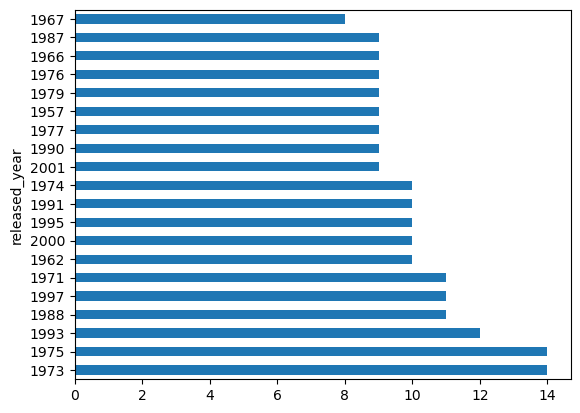

In [28]:
imdb_df['released_year'].value_counts().head(20).plot(kind = 'barh')

Highest movies are released in 1973 & 1975

In [29]:
imdb_df['runtime_mins'].min()

64

Text(0, 0.5, 'Frequency')

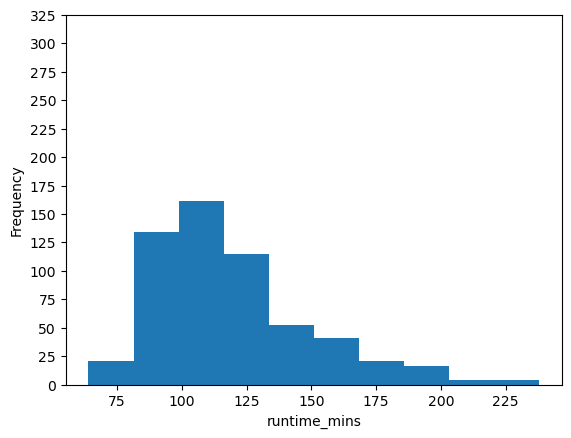

In [30]:
plt.hist(x ='runtime_mins', data = imdb_df)
plt.yticks(range(0, 350, 25))
plt.xlabel('runtime_mins')
plt.ylabel('Frequency')

 The majority of movies fall within the 90-130 minutes range, which aligns with common movie lengths.

In [31]:
imdb_df['certificate'].mode()

0    R
Name: certificate, dtype: object

<Axes: ylabel='certificate'>

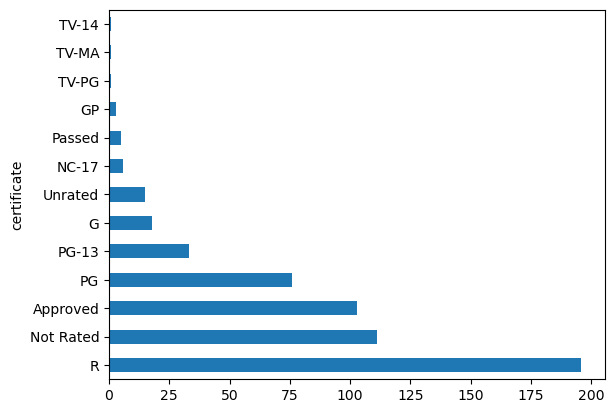

In [32]:
imdb_df['certificate'].value_counts().plot(kind = 'barh')

The majority movies are having 'R' certificate

In [33]:
imdb_df['rating'].median()

7.8

<Axes: >

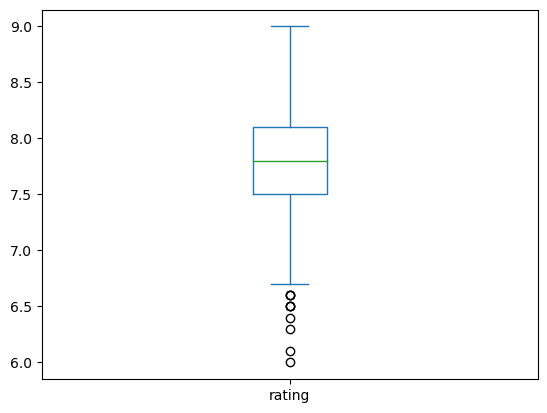

In [34]:
imdb_df['rating'].plot(kind = 'box')

The average rating of movies is 7.8

In [35]:
imdb_df['vote_count'].max()

1000000

Text(0, 0.5, 'Frequency')

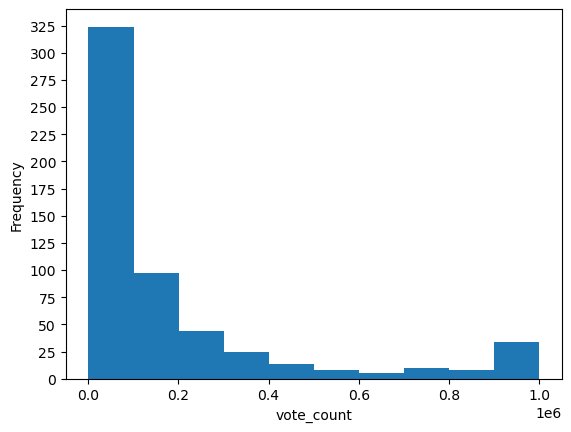

In [36]:
plt.hist(x ='vote_count', data = imdb_df)
plt.yticks(range(0, 350, 25))
plt.xlabel('vote_count')
plt.ylabel('Frequency')

* The majority of movies have low vote counts, while a few movies have very high vote counts.
* The first bin (close to zero) has the highest frequency, meaning many movies received very few votes.

Text(0, 0.5, 'Frequency')

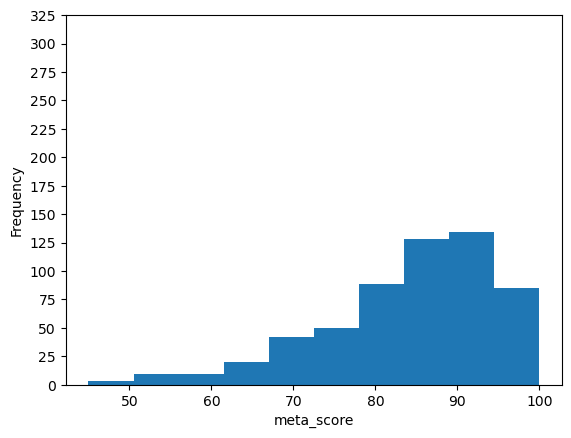

In [37]:
plt.hist(x ='meta_score', data = imdb_df)
plt.yticks(range(0, 350, 25))
plt.xlabel('meta_score')
plt.ylabel('Frequency')

* The highest concentration of movies falls between 80 and 95.
* There are very few movies with scores below 50, meaning poorly rated movies are rare.

<Axes: ylabel='director'>

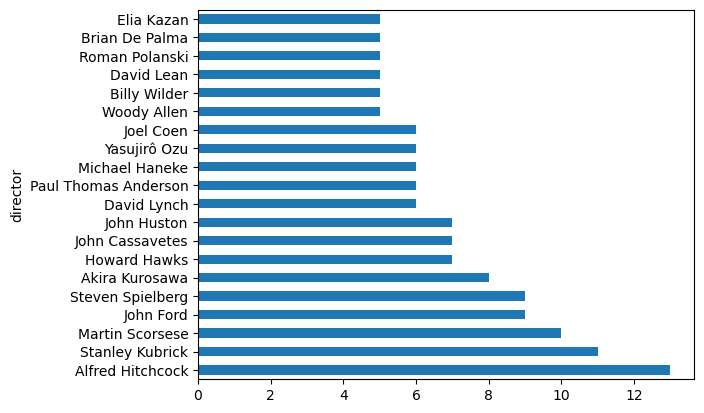

In [38]:
imdb_df['director'].value_counts().head(20).plot(kind = 'barh')

* The highest movies are directed by Alfred Hitchcock.

## Bi-Variate

In [39]:
imdb_df.head()

,movie_name,released_year,runtime_mins,certificate,rating,vote_count,meta_score,director
0,Citizen Kane,1941,119,PG,8.3,476000,100,Orson Welles
1,Vertigo,1958,128,PG,8.3,439000,100,Alfred Hitchcock
2,2001: A Space Odyssey,1968,149,G,8.3,743000,84,Stanley Kubrick
3,Tokyo Story,1953,137,Not Rated,8.1,72000,100,Yasujirô Ozu
4,The Rules of the Game,1939,110,Not Rated,7.9,32000,99,Jean Renoir


In [40]:
imdb_df.dtypes

movie_name        object
released_year      int64
runtime_mins       int64
certificate       object
rating           float64
vote_count         int64
meta_score         int64
director          object
dtype: object

<Axes: xlabel='released_year', ylabel='rating'>

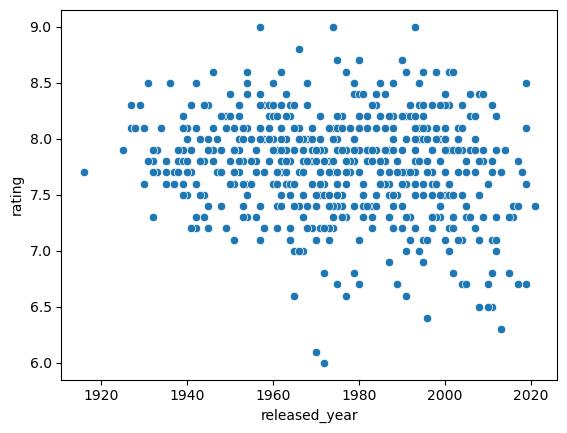

In [41]:
sns.scatterplot(data=imdb_df, x="released_year", y="rating")

* Most movie ratings range between 7.0 and 8.5 and years between 1930 and 2015.
* Older movies (before 1980) mostly have ratings between 7.5 and 8.5, with fewer low ratings.
* Newer movies (after 2000) have a wider range of ratings, from 6.0 to 8.5, meaning more movies received lower ratings.
* This suggests that older movies tend to have higher ratings, while newer movies have more mixed ratings.

<Axes: xlabel='runtime_mins', ylabel='rating'>

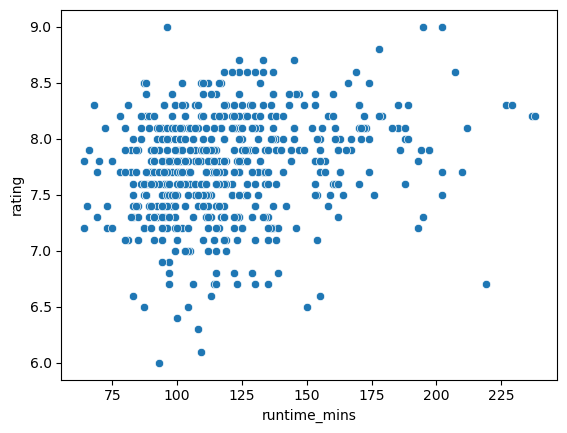

In [42]:
sns.scatterplot(data=imdb_df, x="runtime_mins", y="rating")

* This scatter plot shows the relationship between movie runtime (in minutes) and ratings. 
* Most movies have a runtime between 90 and 150 minutes and ratings between 7.0 and 8.5.
* Some shorter movies (under 100 minutes) have lower ratings, around 6.0 to 7.5.
* Longer movies (over 180 minutes) are fewer but often have ratings between 7.5 and 9.0.
* There is a slight trend where longer movies tend to have higher ratings, but the data is scattered.

<Axes: xlabel='vote_count', ylabel='rating'>

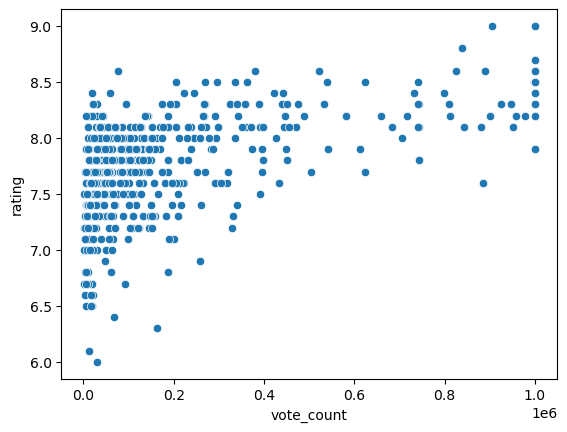

In [43]:
sns.scatterplot(data=imdb_df, x="vote_count", y="rating")

* Movies with fewer votes (0–200,000) have ratings ranging from 6.0 to 8.5. 
* Movies with more votes (200,000–1,000,000) mostly have ratings between 7.5 and 9.0. 
* This suggests that popular movies are usually well-rated.

In [44]:
'''sns.scatterplot(data=imdb_df, x="meta_score", y="rating", hue="certificate")
sns.move_legend(plt.gca(), "upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()'''

'sns.scatterplot(data=imdb_df, x="meta_score", y="rating", hue="certificate")\nsns.move_legend(plt.gca(), "upper left", bbox_to_anchor=(1, 1))\nplt.tight_layout()\nplt.show()'

<Axes: xlabel='meta_score', ylabel='rating'>

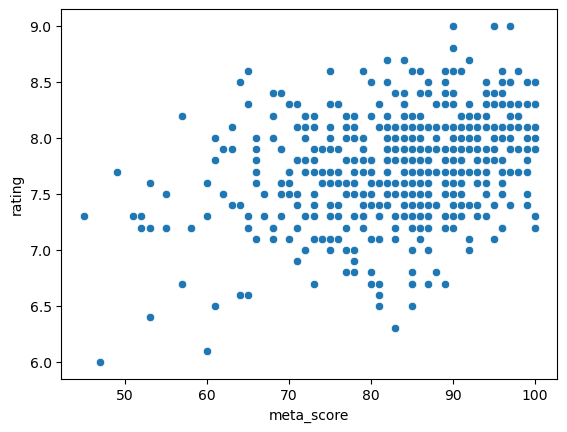

In [45]:
sns.scatterplot(data=imdb_df, x="meta_score", y="rating")

* There is a positive trend, meaning that as the meta score increases, the rating also tends to be higher.
* Most data points are concentrated between 70 and 100 for meta scores and 7.5 to 9.0 for ratings.
* Some movies have lower meta scores (below 60) but still receive decent ratings (above 7.0).
* The highest-rated movies (close to 9.0) usually have meta scores above 80.

C:\Users\SURESH\AppData\Local\Temp\ipykernel_19204\1352532692.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'certificate', y = 'rating', data = imdb_df, ci=None)


<Axes: xlabel='certificate', ylabel='rating'>

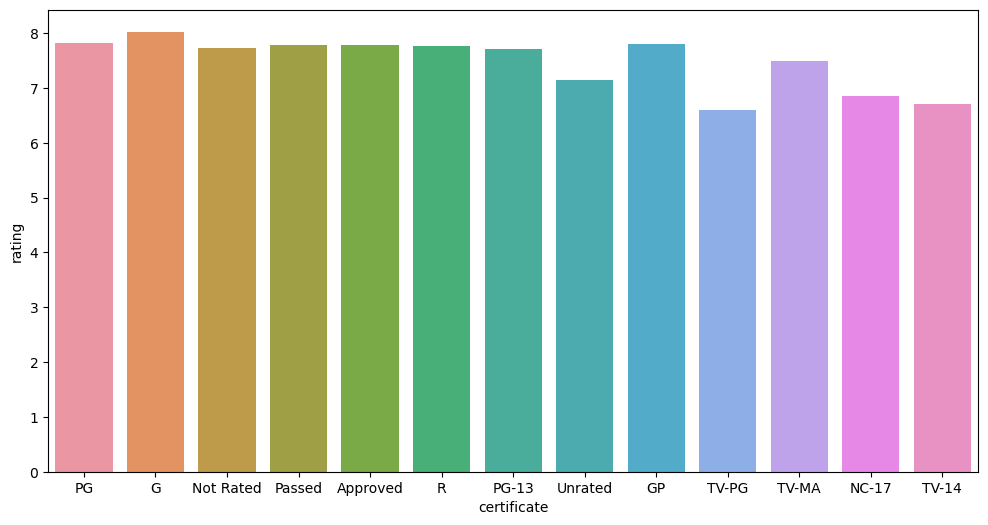

In [46]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'certificate', y = 'rating', data = imdb_df, ci=None)

* The highest-rated movies are G-rated (about 8.1).
* Most certificates, like PG, R, PG-13, and GP, have ratings between 7.5 and 8.0.
* TV-PG has the lowest rating (around 6.5).
* This suggests that general and family-friendly movies (G, PG) tend to have higher ratings.

In [58]:
imdb_df.groupby('director')['rating'].mean().sort_values(ascending = False).head()

director
Irvin Kershner        8.70
Fernando Meirelles    8.60
Masaki Kobayashi      8.60
Jonathan Demme        8.60
Milos Forman          8.55
Name: rating, dtype: float64

<Axes: ylabel='director'>

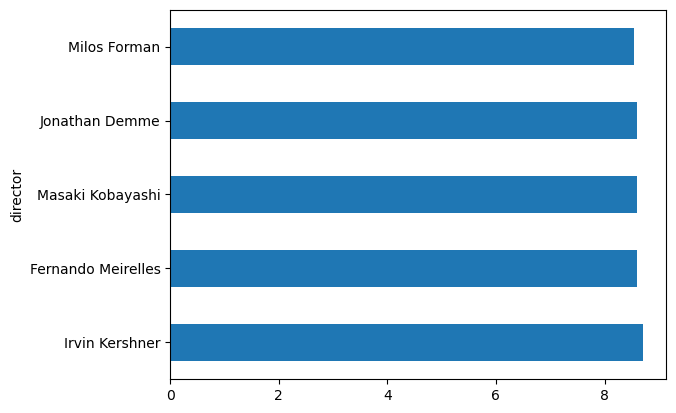

In [55]:
imdb_df.groupby('director')['rating'].mean().sort_values(ascending = False).head().plot(kind = 'barh')

* The highest average rating director is 'Irvin Kershner'.

# Conclusion : 

1. **Older vs. Newer Movies**: Older movies (before 1980) generally have higher ratings, while newer movies (after 2000) show more varied ratings, with some receiving lower scores.

2. **Runtime and Ratings**: Longer movies (over 180 minutes) tend to have higher ratings, while shorter movies (under 100 minutes) often have lower ratings.

3. **Votes and Ratings**: Popular movies (with more votes) usually have higher ratings, while less popular ones have a wider range of ratings.

4. **Meta Score and Ratings**: Higher meta scores are linked to higher ratings. Top-rated movies often have meta scores above 80.

5. **Movie Certificates**: Family-friendly movies (G, PG) tend to have higher ratings, while TV-PG movies have the lowest average ratings.

6. **Top-Rated Director**: The director with the highest average ratings is Irvin Kershner.